RDkit 사용법을 알아보고 SVM으로 간단하게 돌려보자

# RDkit

In [19]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image

RDkit을 사용하기 위해 SMILES (Simplified Molecular Input Line Entry System)라는 line 로테이션에 익숙해져야 한다.

참고할 만한 사이트
- http://www.daylight.com/dayhtml/doc/theory/theory.smiles.html

아스피린으로 사용법을 알아보자

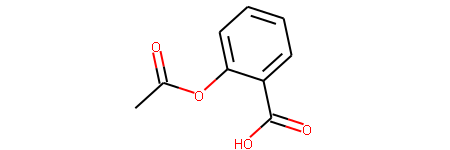

In [14]:
# Aspirin
smi = 'O=C(C)Oc1ccccc1C(=O)O'
m = Chem.MolFromSmiles(smi)
m

원자가 몇개인지 확인하고 싶을때는 아래의 코드를 실행해서 알 수 있으며, 또 수소까지 추가한것도 알 수 있다.

In [17]:
#수소제외
m.GetNumAtoms()

13

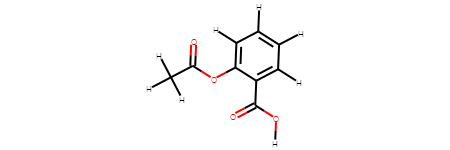

In [22]:
# 수소 포함
m2 = AllChem.AddHs(m)
m2

In [23]:
m2.GetNumAtoms()

21

나중에 Graph Neural Network 등을 사용하기 위해서는 그래프 구조의 데이터로 바꿔줄 필요가 있다. 그럴때는 아래 코드로 쉽게 데이터를 얻을 수 있다.

In [24]:
adj = Chem.rdmolops.GetAdjacencyMatrix(m)
adj

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]], dtype=int32)

Adjacency Matrix 는 연결되면 1 아니면 0을 사용한다.

그외 추가적인 정보도 얻을 수 있다.

In [25]:
for atom in m.GetAtoms():
    print (atom.GetIdx(), "th atom is ", atom.GetSymbol(), ", total number of hydrogens is", atom.GetTotalNumHs(), 
           ", and aromaticity indicator is", atom.GetIsAromatic())

0 th atom is  O , total number of hydrogens is 0 , and aromaticity indicator is False
1 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is False
2 th atom is  C , total number of hydrogens is 3 , and aromaticity indicator is False
3 th atom is  O , total number of hydrogens is 0 , and aromaticity indicator is False
4 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
5 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
6 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
7 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
8 th atom is  C , total number of hydrogens is 1 , and aromaticity indicator is True
9 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is True
10 th atom is  C , total number of hydrogens is 0 , and aromaticity indicator is False
11 th atom is  O , total number of hydrogens is 0 , and aro

이 외에도 다양한 분자의 특성을 알아 낼 수 있다.

In [26]:
from rdkit.Chem.Descriptors import ExactMolWt
from rdkit.Chem.Crippen import MolLogP
from rdkit.Chem.rdMolDescriptors import CalcTPSA
from rdkit.Chem.QED import qed

molWt = ExactMolWt(m)
logP = MolLogP(m)
TPSA = CalcTPSA(m)
_qed = qed(m)

molWt, logP, TPSA, _qed

(180.042258736, 1.3101, 63.60000000000001, 0.5501217966938848)

분자의 구조를 2진수 벡터로 나타낸 fingerprint를 얻을 수 있다.

In [29]:
fp_aspirin = Chem.AllChem.GetMorganFingerprint(m,2)

이때 2는 알고리즘의 반복 횟수를 나타낸다.

알고리즘에 대해 참고할 주소는 아래확인

- https://pubs.acs.org/doi/10.1021/ci100050t 
- https://docs.chemaxon.com/display/docs/Extended+Connectivity+Fingerprint+ECFP

fingerprint로 다른 분자와 유사성을 알아 낼 수 있다.

잘 알려진 비스테로이드 항염증제(NSAIDs)인 [아스피린](https://en.wikipedia.org/wiki/Aspirin)과 이부프로펜([Ibuprofen](https://en.wikipedia.org/wiki/Ibuprofen))을 사용해보자

그 전에 이부프로펜을 확인하고 fingerprint를 얻어내자

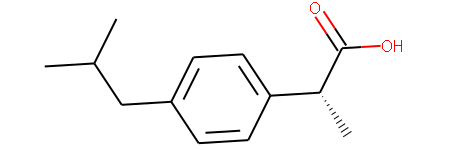

In [33]:
ib_smi = 'CC(C)Cc1ccc(cc1)[C@@H](C)C(=O)O' #from wiki
m_ibuprofen = Chem.MolFromSmiles(ib_smi)
m_ibuprofen

In [34]:
fp_ibuprofen = Chem.AllChem.GetMorganFingerprint(m_ibuprofen, 2)

유사성을 확인하기 위해 rdkit의 DataStructs을 사용하자

In [35]:
from rdkit import DataStructs
similarity = DataStructs.TanimotoSimilarity(fp_aspirin, fp_ibuprofen)
similarity

0.22950819672131148

RDkit 튜토리얼 : https://github.com/rdkit/rdkit-tutorials